# <font color=PURPLE>Convolutional Neural Network (CNN)</font>

## <font color=GREEN>Import</font>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.client import device_lib
from termcolor import colored

### <font color=PINK>Utilities</font>

In [2]:

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

def log(label, message):
    print(colored(label, 'blue'), colored(message, 'green'))
    
def loadModel():    
    model = tf.keras.models.load_model('../out/model.h5')
    model.summary()
    return model

### <font color=PINK>Environment</font>

In [3]:
log('Your Tensorflow Version: ', tf.version.VERSION)
log('GPU:', get_available_gpus())

Your Tensorflow Version:  2.0.0
GPU: ['/device:GPU:0']


### <font color=PINK>Load Data</font>

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### <font color=PINK>Load Model</font>

In [5]:
model = loadModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## <font color=GREEN>Do Prediction</font>

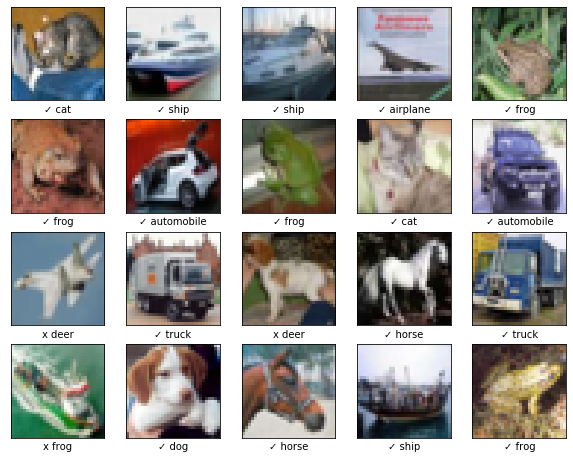

In [6]:
plt.figure(figsize=(10,10))
for i in range(20):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    # actual class
    actual_class = class_names[test_labels[i][0]]
            
    # do the prediction
    prediction = model.predict(test_images)[i]
    label_idx = np.where(prediction == np.amax(prediction))[0][0]    
    predicted_class = class_names[label_idx]
    
    # did it predict right
    status = '✓' if (predicted_class == actual_class) else 'x' 
                   
    # add the labels
    plt.xlabel(status + ' ' + predicted_class)
plt.show()